In [ ]:
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from termcolor import colored
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import datasets
print("Loading data")
train_data = pd.read_csv('/content/drive/My Drive/traning.csv',encoding="ISO-8859-1", names=["target", "ids", "date", "flag", "user", "text"])
train_data

Loading data


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
train_data.target.unique()

array([0, 4])

In [ ]:
train_data['target'].value_counts()

4    800000
0    800000
Name: target, dtype: int64

In [ ]:
train_data.drop(['ids','flag','date','user'],axis=1,inplace=True)
train_data['target']=train_data['target'].apply(lambda x: x/4)

In [ ]:
# Setting stopwords
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.remove("not")

# Function to expand tweet
def expand_tweet(tweet):
	expanded_tweet = []
	for word in tweet:
		if re.search("n't", word):
			expanded_tweet.append(word.split("n't")[0])
			expanded_tweet.append("not")
		else:
			expanded_tweet.append(word)
	return expanded_tweet



In [ ]:
# Function to process tweets
def clean_tweet(data, wordNetLemmatizer, porterStemmer):
	data['Clean_tweet'] = data['text']
	print(colored("Removing user handles starting with @", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].str.replace("@[\w]*","")
	print(colored("Removing numbers and special characters", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].str.replace("[^a-zA-Z' ]","")
	print(colored("Removing urls", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].replace(re.compile(r"((www\.[^\s]+)|(https?://[^\s]+))"), "")
	print(colored("Removing single characters", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].replace(re.compile(r"(^| ).( |$)"), " ")
	print(colored("Tokenizing", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].str.split()
	print(colored("Removing stopwords", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: [word for word in tweet if word not in STOPWORDS])
	# data['Clean_tweet'] = data['Clean_tweet'].apply(lambda x: ' '.join([w for w.split() in x if len(w) > 3]))
	print(colored("Expanding not words", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: expand_tweet(tweet))
	print(colored("Lemmatizing the words", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: [wordNetLemmatizer.lemmatize(word) for word in tweet])
	print(colored("Stemming the words", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: [porterStemmer.stem(word) for word in tweet])
	print(colored("Combining words back to tweets", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: ' '.join(tweet))
	return data



In [ ]:
# Define processing methods
wordNetLemmatizer = WordNetLemmatizer()
porterStemmer = PorterStemmer()

# Pre-processing the tweets
train_data = clean_tweet(train_data, wordNetLemmatizer, porterStemmer)

Removing user handles starting with @
Removing numbers and special characters
Removing urls
Removing single characters
Tokenizing
Removing stopwords
Expanding not words
Lemmatizing the words
Stemming the words
Combining words back to tweets


In [ ]:
train_data.head(10)

,target,text,Clean_tweet
0,0.0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",httptwitpiccomyzl awww that' bummer you should...
1,0.0,is upset that he can't update his Facebook by ...,upset ca not updat facebook text might cri res...
2,0.0,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save the rest go bound
3,0.0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0.0,"@nationwideclass no, it's not behaving at all....",not behav i'm mad ca not see
5,0.0,@Kwesidei not the whole crew,not whole crew
6,0.0,Need a hug,need hug
7,0.0,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time see ye rain bit bit lol i'm fine...
8,0.0,@Tatiana_K nope they didn't have it,nope
9,0.0,@twittera que me muera ?,que muera


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

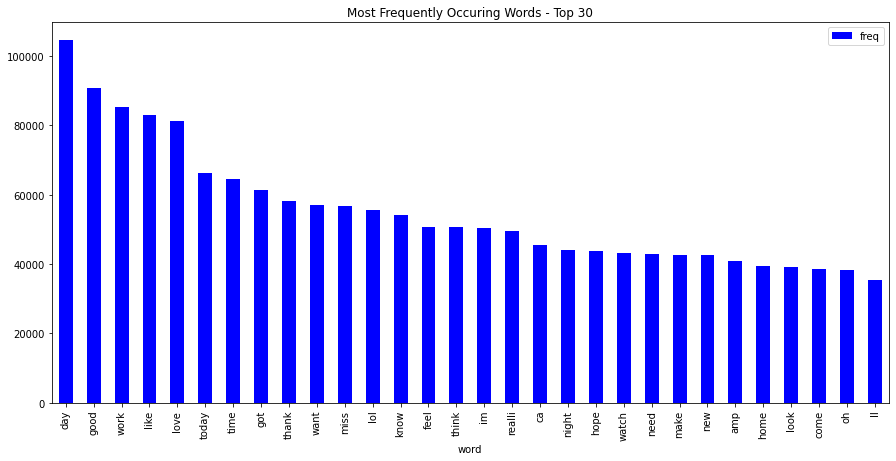

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train_data.Clean_tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Tweets \n')

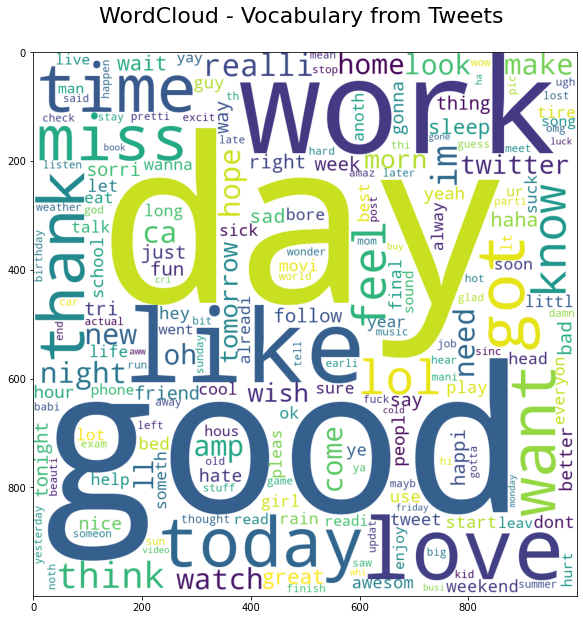

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Tweets \n", fontsize = 22)

In [ ]:
train_data['target'].value_counts()

1.0    800000
0.0    800000
Name: target, dtype: int64

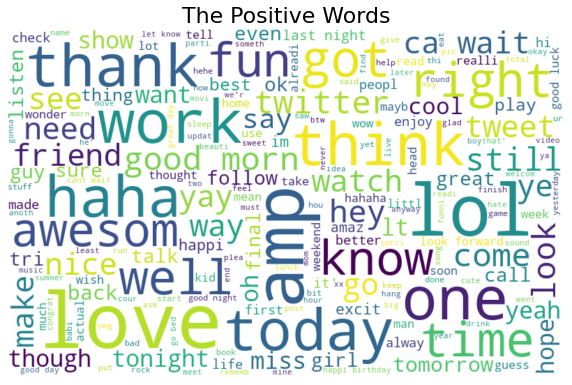

In [ ]:
positive_words =' '.join([text for text in train_data['Clean_tweet'][train_data['target'] == 1]])

wordcloud = WordCloud(width=800, height=500,background_color = 'white', random_state = 0, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words', fontsize = 22)
plt.show()

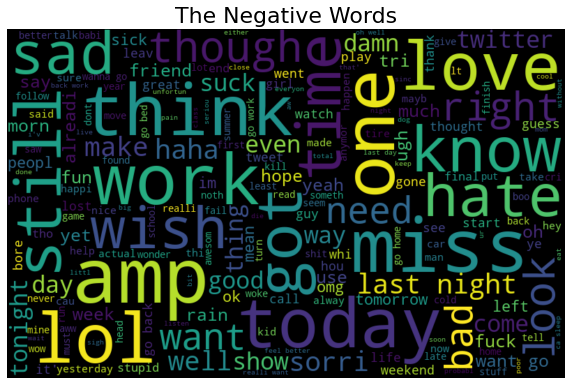

In [ ]:
negative_words =' '.join([text for text in train_data['Clean_tweet'][train_data['target'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words' , fontsize = 22)
plt.show()

In [ ]:
"""normal_words =' '.join([text for text in train_data['Clean_tweet'][train_data['sentiment'] == 'neutral']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()"""

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_data["Clean_tweet"], train_data["target"], test_size = 0.2, random_state = 255)

print("Data Training: " + str(X_train.count()))
print("Data Testing: " + str(X_test.count()))

Data Training: 1280000
Data Testing: 320000


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix

cvec=CountVectorizer(ngram_range=(1, 2))
tvec=TfidfVectorizer(ngram_range=(1, 2))
nb=MultinomialNB(1.5,fit_prior=False)

model_4= Pipeline([('vectorizer',tvec),('classifier',nb)])
model_4.fit(X_train,Y_train)
N_B=model_4.predict(X_test)
NB_score = accuracy_score(N_B,Y_test)
NB_training_score = model_4.score(X_train,Y_train)
print(NB_training_score, NB_score)

0.88706015625 0.78285


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
#bikin vectorizer, setting bisa diatur2
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix

def prediction_measure(X_train,Y_train,X_test,Y_test):
  cvec=CountVectorizer()
  tvec=TfidfVectorizer()
  #bikin classifier, setting bisa diatur2
  clf1 = RandomForestClassifier(n_estimators = 200 ,criterion = 'entropy')
  clf2 = LogisticRegression(fit_intercept = False, random_state = 255, max_iter = 1000)
  clf3 = BernoulliNB(alpha = 1.0)
  clf4 = SVC(kernel = 'rbf')
  clf5 = DecisionTreeClassifier(criterion='entropy')
  modell = XGBClassifier()
  print(colored("Initializing different algorithm to test the accuracy of Data \n", "yellow"))

  def LogisticRegress():
    # print(colored("Initial", "yellow"))
    model_2= Pipeline([('vectorizer',cvec),('classifier',clf2)])
    model_2.fit(X_train,Y_train)
    Logrgssr=model_2.predict(X_test)
    Logistic_score = accuracy_score(Logrgssr,Y_test)
    Logistic_training_score = model_2.score(X_train,Y_train)
    return Logistic_training_score, Logistic_score

  def randomForest():
    
    model_1= Pipeline([('vectorizer',tvec),('classifier',clf1)])
    model_1.fit(X_train,Y_train)
    randomForestobj=model_1.predict(X_test)
    randomForest_score = accuracy_score(randomForestobj,Y_test)
    randomForest_training_score = model_1.score(X_train,Y_train)
    return randomForest_training_score, randomForest_score
  
  def SVMachine():
    
    model_3= Pipeline([('vectorizer',tvec),('classifier',clf3)])
    model_3.fit(X_train,Y_train)
    SVMA=model_3.predict(X_test)
    SVMA_score = accuracy_score(SVMA,Y_test)
    SVMA_training_score = model_3.score(X_train,Y_train)
    return SVMA_training_score, SVMA_score
  
  def Burnolli():
    
    model_4= Pipeline([('vectorizer',tvec),('classifier',clf4)])
    model_4.fit(X_train,Y_train)
    BrnliNB=model_4.predict(X_test)
    BrnliNB_score = accuracy_score(BrnliNB,Y_test)
    BrnliNB_training_score = model_4.score(X_train,Y_train)
    return BrnliNB_training_score, BrnliNB_score
  
  def Decision():
    
    model_5= Pipeline([('vectorizer',tvec),('classifier',clf5)])
    model_5.fit(X_train, Y_train)
    Decision_tree = model_5.predict(X_test)
    Decision_tree_score = accuracy_score(Decision_tree,Y_test)
    Decision_tree_training_score = model_5.score(X_train,Y_train)
    return Decision_tree_training_score, Decision_tree_score

  def XGBoosting():
    model= Pipeline([('vectorizer',tvec),('classifier',modell)])
    model.fit(X_train, Y_train)
    XGBoost = model.predict(X_test)
    XGBoost_score = accuracy_score(XGBoost,Y_test)
    XGBoost_training_score = model.score(X_train,Y_train)
    return XGBoost_training_score, XGBoost_score
  
  a1 = LogisticRegress()
  a2 = randomForest()
  a3 = SVMachine()
  a4 = Burnolli()
  a5 = Decision()
  a6 = XGBoosting()
  print("Model Trained \t\t Training Accuracy , Validation Accuracy ")
  print("1.Logistic Regression \t",a1)
  print("2.Random Forest \t",a2)
  print("3.SVM Regression \t",a3)
  print("4.Naive Burnolli \t",a4)
  print("5.Decision Tree \t",a5)
  print("6.XG Boosting   \t",a6)
  
  # a1 = LogisticRegress()[1]
  # a2 = randomForest()[1]
  # a3 = SVMachine()[1]
  # a4 = Burnolli()[1]
  # a5 = Decision()[1]
  # a6 = XGBoosting()[1]
  listitem = [a1[1],a2[1],a3[1],a4[1],a5[1],a6[1]]
  print("\nThe Maximum Accuracy is : ",max(listitem))


In [ ]:
prediction_measure(X_train,Y_train,X_test,Y_test)

Initializing different algorithm to test the accuracy of Data 

